# Homework # 8

### Juan Martin Morelli (N12699038)

### Exercise 1:
*Let $S$ be a discrete set. Show that if $\mathcal{P}(S)$ is compact as a subset of $(\mathcal{l}_{1}(S),\|\dot{}\|)$, then $S$ must be finite.*


I will prove it by contradiction. This means thinking on a sequence of distributions over an infinite set $S$ such that the sequence admits no convergent subsequence. Then, by definition of compactness, $\mathcal{P}(S)$ would not be compact, arriving to a contradiction.

So I need to construct a sequence of distributions, such that the $\|\dot{}\|_{1}$ is greater than one for two consecutive distributions. Recall $\|h\|_{1}=\sum_{x\in S}|h(x)|.$

Take the following sequence of distributions over the natural numbers:
$\phi_{n}(x) = \mathbf{1}\{x=n\}$.


Note that for two different natural numbers $m,n$, the distributions are never going to equal 1 at the same point.

Then,

$\left\|\phi_{n}-\phi_{m}\right\|_{1} = \sum_{x\in\mathcal{N}}\left|\phi_{n}(x)-\phi_{m}(x)\right|=2$

So this sequence of distributions will have no convergent subsequence, and in this case $\mathcal{P}(S)$ is not compact. CONTRADICTION.

### Exercise 2:

Deterministic Markov Chain: $X_{t+1}=X_{t}+1$

Kernel: $p(x,y)=1\{x=y-1\}$

Clearly the state space is not finite since the variable increases (deterministically) with time.

No current value is ever reached again.

The markov operator is:

\begin{equation}
\Psi_{t+1}(y)=\sum_{x\in S}\mathbf{1}\left(x=y-1\right)\Psi_{t}(x)
\end{equation}

Thinkning on the (infinite dimension) Markov transition probability matrix, it looks as the identity matrix, except that we append a first column of zeros. Hence, the state is always changing, and the current state is never reached again. So no stationary distribution will exist.


Start with a distrubution $\Psi_{t}(x)$ and apply to it the Markov operator. Then the distribution is going to be shifted one position (element-wise). By this logic, no matter how many times we apply the Markov operator, we would never converge.

### Exercise 3:

Let the inventory at the begining of time $t$ be $X_{t}$

If $X_{t}\leq q$ then the firm orders $Q-X_{t}$. Otherwise nothing.

At the end of period $t$, the firm observes demand $D_{t+1}$. The firm meets the demand up to its stock.

Hence, next period's stock is going to be either $X_{t+1}=Q-D_{t+1}$ or $X_{t+1}=X_{t}-D_{t+1}$.

$\{D_{t}\}$ is assumed to be i.i.d. with $P\{D_{t}=d\}=(1/2)^{d+1}$ for $d=0,1,2...$

The associated stochastic kernel is $p(x,y)=P\{X_{t+1}=y|X_{t}=x\}$

\begin{equation}
P\left(X_{t+1}=y\in\{1,...,Q\}|X_{t}=Q\right) = \left(\frac{1}{2}\right)^{Q+1-y}\\
P\left(X_{t+1}=0|X_{t}=Q\right) = 1-\sum_{y\in\{1,...,Q\}}\left(\frac{1}{2}\right)^{Q+1-y}\\
P\left(X_{t+1}=y\in\{1,...,x\}|X_{t}=x>q\right) = \left(\frac{1}{2}\right)^{x+1-y}\\
P\left(X_{t+1}=0|X_{t}=x>q\right) = 1-\sum_{y\in\{1,...,Q\}}\left(\frac{1}{2}\right)^{x+1-y}\\
P\left(X_{t+1}=y>x|X_{t}=x>q\right) = 0
\end{equation}

Note then that the diagonal of the Markov transition matrix is positive. Hence, by definition, the process is aperiodic (just take $n=1$).

Also, note that $P\left(X_{t+1}=y>x|X_{t}=x>q\right)=0$. So for the rows where $X_{t}>q$, the section to the right of the diagonal is composed by zeros. However, after some time, it will happen that the stock is going to fall below $q$, so effectively there exists a period $k$ such that $P^{k}(x,y)>0$ for any pair. Hence it is also irreducible.

So, by theorem, it is globally stable.

### Exercise 4:

In [75]:
using QuantEcon

type inventories
    q::Int64  # Threshold
    Q::Int64  # Reset value
    Pd::Function  # Probability function for demand
end

function compute_transition_matrix(invent::inventories)

    S = 0:1:invent.Q
    P = zeros(length(S),length(S))

    for (x_i,x_val) in enumerate(S)
        if x_val<=invent.q
            P[x_i,2:end] = invent.Pd(sort(collect(0:1:invent.Q-1),rev=true))
            P[x_i,1] = (1-sum(P[x_i,2:end],2))[1]
        else
            P[x_i,2:x_i] = invent.Pd(sort(collect(0:1:x_val-1),rev=true))
            P[x_i,1] = 1 - sum(P[x_i,2:end])
        end
    end
    
    return P
end

q = 2
Q = 5
Pd(d::Array{Int64,1}) = 0.5.^(d+1)

invent = inventories(q,Q,Pd)

P = compute_transition_matrix(invent)


6x6 Array{Float64,2}:
 0.03125  0.03125  0.0625  0.125  0.25  0.5
 0.03125  0.03125  0.0625  0.125  0.25  0.5
 0.03125  0.03125  0.0625  0.125  0.25  0.5
 0.125    0.125    0.25    0.5    0.0   0.0
 0.0625   0.0625   0.125   0.25   0.5   0.0
 0.03125  0.03125  0.0625  0.125  0.25  0.5

Now I compute the invariant distrubution using QuantEcon.
However, it should be straightforward by just computing the Eigenvalue Decomposition.

In [76]:
mc=MarkovChain(P)
P_invariant = mc_compute_stationary(mc)

6-element Array{Float64,1}:
 0.0625
 0.0625
 0.125 
 0.25  
 0.25  
 0.25  

Just as a cross-check (and to get to know the package in Julia), below I corroborate that effectively the process is aperiodic and irreducible:

In [72]:
is_aperiodic(mc)

true

In [74]:
is_irreducible(mc)

true

### Exercise 5:

*Now compute the stationary distribution iteratively, using the ideas from the lecture. Terminate when successive iterates are closer together than some tolerance in the sense of $\ell_{1}$ distance. Compare your result with the result from the previous exercise.*

I just have to iterate over the Markov transition matrix until the convergence criterion.
Note that since the state-space is finite, the norms are equivalent. Hence I compute the norm given by Julia's command `norm`.

In [88]:
err = 1
Pt = P
while err>1.0e-10
    Pt1 = Pt
    Pt = Pt*P
    err = norm(Pt-Pt1)
end
P_invariant_iter = Pt[1,:]

1x6 Array{Float64,2}:
 0.0625  0.0625  0.125  0.25  0.25  0.25

### Exercise 6:

*Finally, set $Q = 20$ and plot the stationary distribution for $q = 2, 5, 10, 15$. Give some interpretation for what you see.*

For this exercise I just change the parameters, since I already have the general structure.

In [100]:
Q = 20
qvec = [2,5,10,15]

P_invariant_ex6 = Array(Float64,length(qvec),Q+1)

for (q_i,q_val) in enumerate(qvec)
    invent = inventories(q_val,Q,Pd)
    P = compute_transition_matrix(invent)
    mc=MarkovChain(P)
    P_invariant_ex6[q_i,:] = mc_compute_stationary(mc)
end

P_invariant_ex6[1,:]
collect(0:1:Q)'


1x21 Array{Int64,2}:
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20

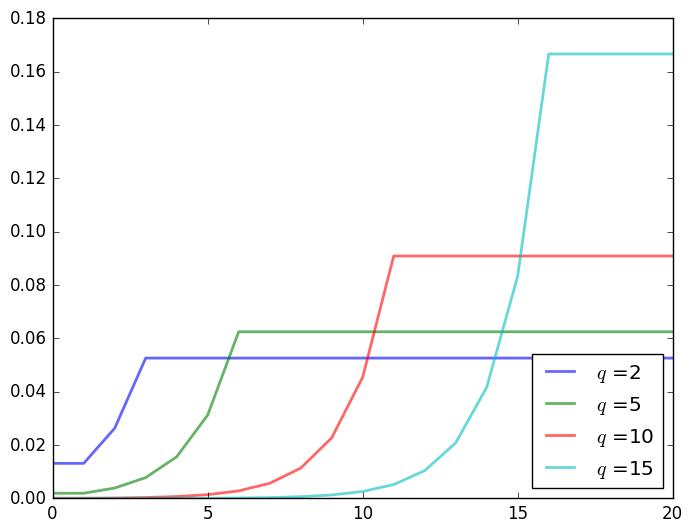

PyObject <matplotlib.legend.Legend object at 0x320444e90>

In [107]:
using PyPlot


fig, ax = subplots()
for (q_i, q_val) in enumerate(qvec)
    ax[:plot](collect(0:1:Q), P_invariant_ex6[q_i,:]', linewidth=2, alpha=0.6, label=L"$q$ =""$q_val")
end
ax[:legend](loc=4)

As we increase the threshold, the firm will update its inventories sooner. Hence, as $q$ increases, the probability of having high levels of inventories also increases.

The following shows the same plot but in bars.

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x324566b50>)

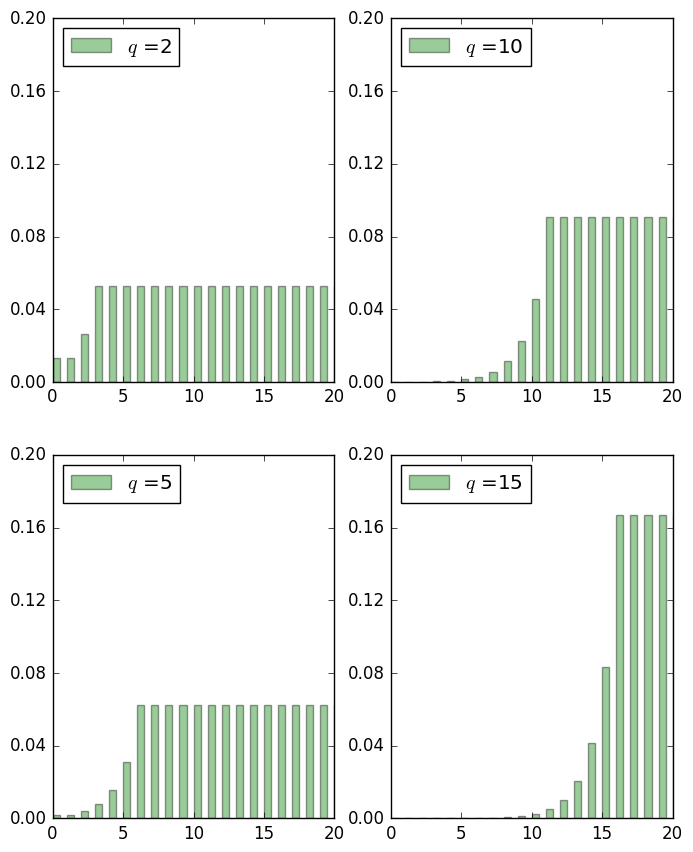

In [116]:
PyPlot.subplots_adjust(wspace = 0.5, hspace = 0.3)
fig, axes = subplots(2, 2, figsize = (8,10))
for (q_i, q_val) in enumerate(qvec)
    ax = axes[q_i]
    ax[:set_yticks]((0:0.04:0.20))
    ax[:bar](collect(0:1:Q), P_invariant_ex6[q_i,:]', 0.5, color = "green", alpha=0.4, label=L"$q$ =""$q_val")
    ax[:set_xlim](0,20)
    ax[:set_ylim](0,0.20)
    ax[:legend](bbox_to_anchor = (0.66,-0.06,0.,0.), fontsize = 13)
    ax[:legend](loc=2)
end